In [69]:
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
from numpy import median
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pylab import rcParams
import matplotlib
from collections import Counter

First, let's load the movie dataset with release date

In [70]:
def load_tmdb_movies():
    file = pd.read_csv('tmdb_5000_movies.csv')
    file['release_date'] = pd.to_datetime(file['release_date']).apply(lambda x: x.date()) #convert to date time for us
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages'] #these are json cols
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test = load_tmdb_movies()
test.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [71]:
def load_tmdb_credits(path):
    file = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test_credits = load_tmdb_credits("tmdb_5000_credits.csv")
test_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [72]:
#LOAD CSV's 
movies = load_tmdb_movies()
credits = load_tmdb_credits("tmdb_5000_credits.csv")

In [73]:
# THESE FUNCTIONS ARE IF WE NEED EXTRA FIELDS LATER from imdb ofc taken from https://www.kaggle.com/tanetboss/beginner-binary-classification-for-nice-movie/notebook#Ok-let-check-the-feature-importance
#GOAL to predict if a movie is nice before it releases 
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version. 
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    tmdb_movies['title_month'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.month)

    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['companies_1'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['companies_2'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['companies_3'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [74]:
pretreated_data = convert_to_original_format(movies, credits)
pretreated_data.head()

C:\Users\saish\AppData\Local\Temp/ipykernel_29620/368782554.py:43: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,title_year,title_month,country,director_name,actor_1_name,actor_2_name,actor_3_name,companies_1,companies_2,companies_3
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,2009.0,12.0,United States of America,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,2007.0,5.0,United States of America,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,2015.0,10.0,United Kingdom,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,2012.0,7.0,United States of America,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,2012.0,3.0,United States of America,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN


Let's clean up the data by removing irrelevant fields and checking for invalid values

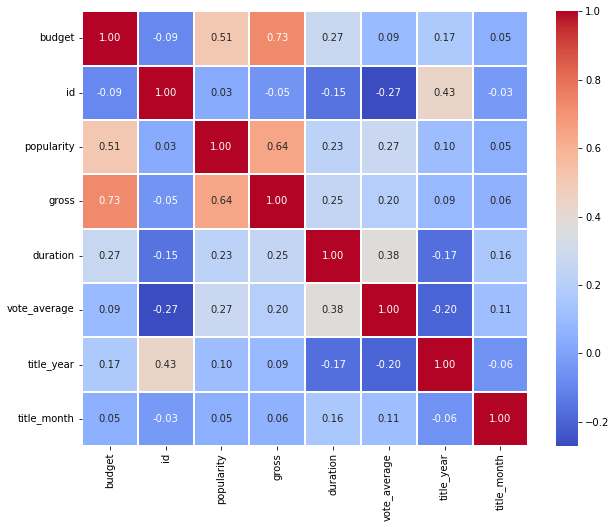

In [75]:
#dropping irel features 2 
pretreated_data.drop(['num_voted_users'], axis=1, inplace=True)
pretreated_data.drop(['homepage'], axis=1, inplace=True)
#correlation matrix with numerical values 
plt.figure(figsize = (10,8))
g = sns.heatmap(pretreated_data[list(pretreated_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

<Figure size 720x576 with 0 Axes>

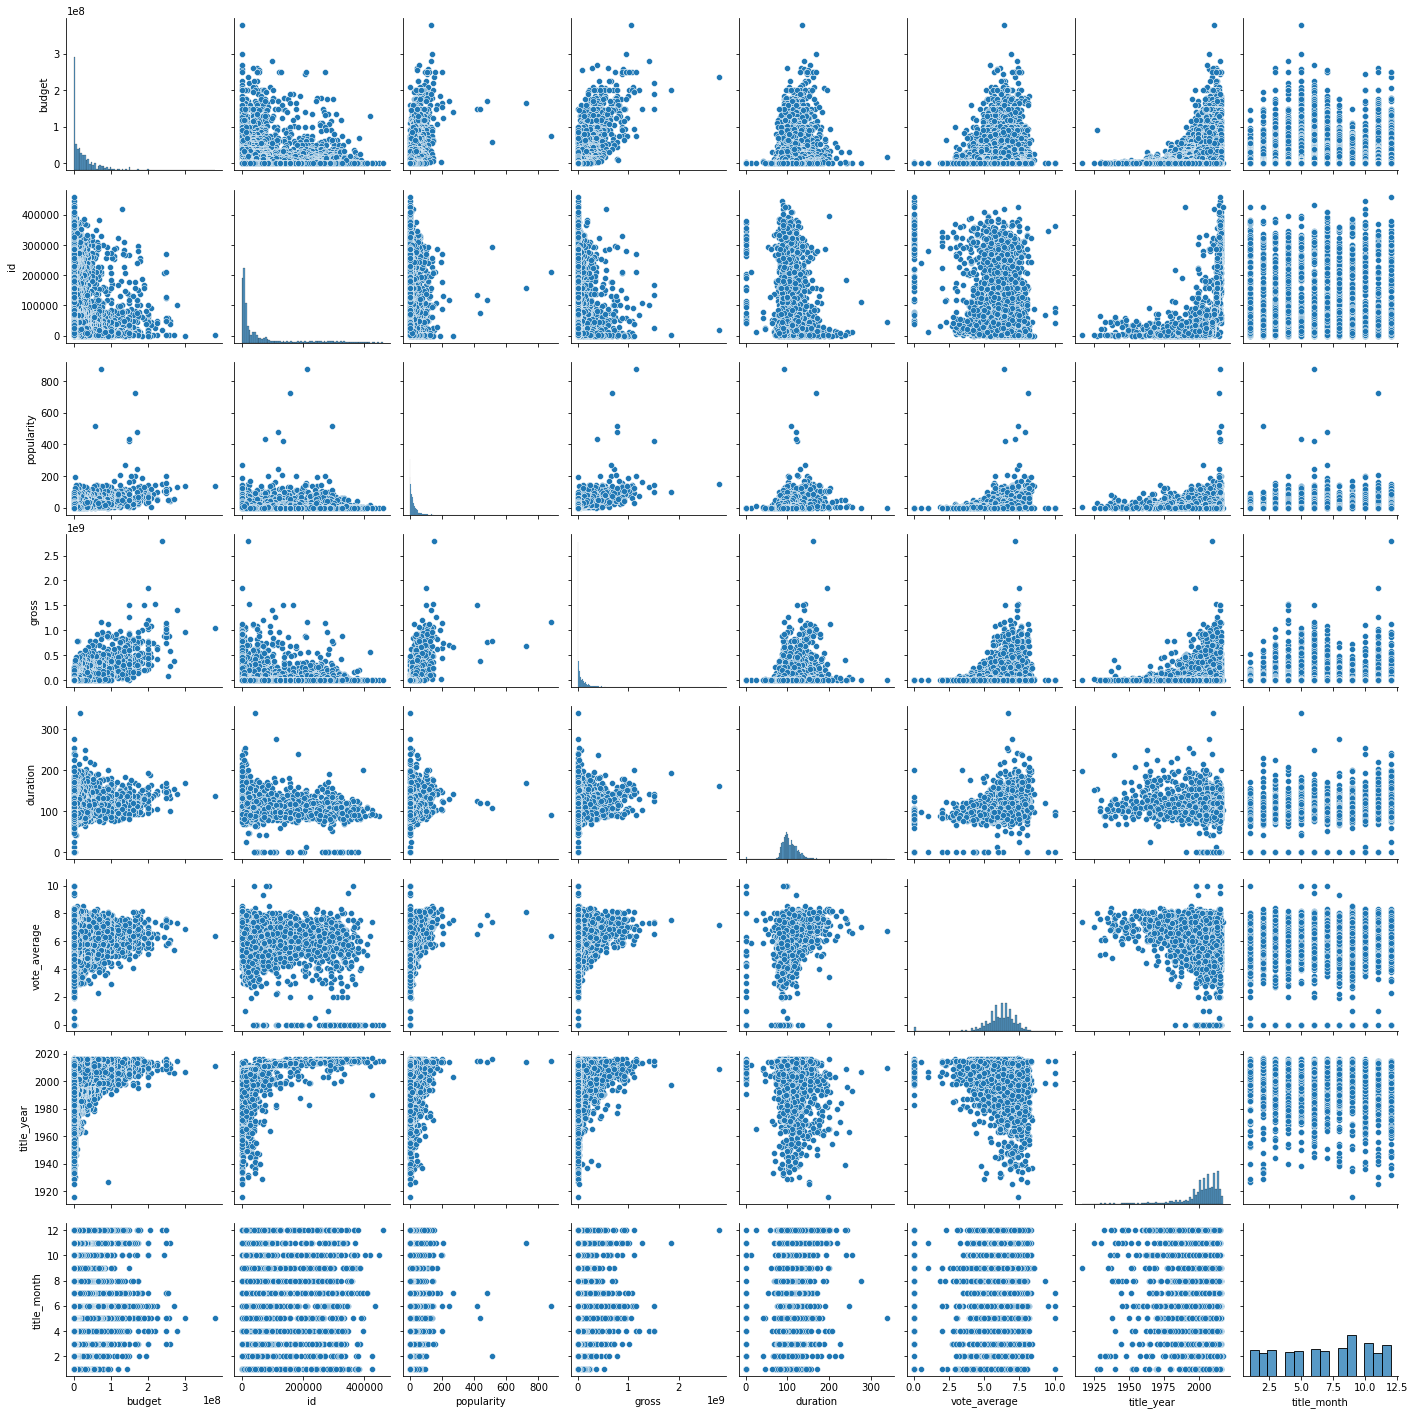

In [76]:
# pair plot to visualize data
plt.figure(figsize = (10,8))
g = sns.pairplot(pretreated_data,palette="bright")

In [77]:
#title year and vote average + duration cleaup 
pretreated_data = pretreated_data[pretreated_data['vote_average'] != 0]
pretreated_data = pretreated_data[pretreated_data['duration'] != 0]
pretreated_data.columns
data= pretreated_data.copy()

Let's convert all the appropriate fields into 1's and 0's for classification 

In [78]:
#convert budget into 1's and 0's for budget: 
import statistics
sd = statistics.stdev(data.budget)
mean = data.budget.mean()
max = data.budget.max()
min = data.budget.min()

#these are hard coded amount of fields and values we can change this accordingly 
#these are def arbitrarly set into 
data['extremelylow'] = data['budget'].map(lambda s: 1 if s < 5000000 else 0)
data['verylow'] = data['budget'].map(lambda s: 1 if 5000000 <= s < 10000000 else 0)
data['low'] = data['budget'].map(lambda s: 1 if 10000000 <= s < mean else 0)
data['avg'] = data['budget'].map(lambda s: 1 if  mean <= s < mean+sd  else 0)
data['high'] = data['budget'].map(lambda s: 1 if mean+sd <= s < 100000000 else 0)
data['veryhigh'] = data['budget'].map(lambda s: 1 if 100000000 < s < 150000000 else 0)
data['blockbusterhigh'] = data['budget'].map(lambda s: 1 if s >= 150000000 else 0)

In [79]:
data.head()

,budget,genres,id,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,...,companies_1,companies_2,companies_3,extremelylow,verylow,low,avg,high,veryhigh,blockbusterhigh
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,0,0,0,0,0,0,1
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,0,0,0,0,0,0,1
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",...,Columbia Pictures,Danjaq,B24,0,0,0,0,0,0,1
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Legendary Pictures,Warner Bros.,DC Entertainment,0,0,0,0,0,0,1
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Walt Disney Pictures,NaN,NaN,0,0,0,0,0,0,1


In [80]:
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'extremelylow', 'verylow', 'low', 'avg', 'high',
       'veryhigh', 'blockbusterhigh'],
      dtype='object')

In [81]:
#convert month to season 
data['Spring'] = data['title_month'].map(lambda s: 1 if 1 <= s <= 4 else 0)
data['Summer'] = data['title_month'].map(lambda s: 1 if 5 <= s <= 7 else 0)
data['Fall'] = data['title_month'].map(lambda s: 1 if 8 <= s <= 9 else 0)
data['Winter'] = data['title_month'].map(lambda s: 1 if 10 <= s <= 12 else 0) 

In [82]:
#duration 
data = data[np.isfinite(data['duration'])]
data['Lessthan90'] = data['duration'].map(lambda s: 1 if s < 90 else 0)
data['90-120'] = data['duration'].map(lambda s: 1 if 90 <= s < 120 else 0)
data['120-150'] = data['duration'].map(lambda s: 1 if 120 <= s < 150  else 0)
data['Morethan150'] = data['duration'].map(lambda s: 1 if s >= 150  else 0)
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'extremelylow', 'verylow', 'low', 'avg', 'high',
       'veryhigh', 'blockbusterhigh', 'Spring', 'Summer', 'Fall', 'Winter',
       'Lessthan90', '90-120', '120-150', 'Morethan150'],
      dtype='object')

In [83]:
#genre
# impact on cross-validation scores:
# popularity success -> +3
# vote success -> +2.5-3
# commercial success -> -4.5-5
data['genres'].head()
genresUnflattened = list(map(lambda x: x.split('|'), data['genres']))
genres = set([item for subl in genresUnflattened for item in subl])
genres.remove('')
for genre in genres:
    data[genre] = data['genres'].map(lambda s: 1 if genre in str(s) else 0)
# data1.head()
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'extremelylow', 'verylow', 'low', 'avg', 'high',
       'veryhigh', 'blockbusterhigh', 'Spring', 'Summer', 'Fall', 'Winter',
       'Lessthan90', '90-120', '120-150', 'Morethan150', 'History',
       'Documentary', 'Science Fiction', 'Animation', 'Music', 'Thriller',
       'Foreign', 'TV Movie', 'Romance', 'Comedy', 'Adventure', 'Family',
       'Western', 'Drama', 'Horror', 'Mystery', 'Fantasy', 'War', 'Crime',
       'Action'],
      dtype='object')

We also need to define our measurement for success

In [84]:
#Actually these are the 3 success in a nutshell
popularity_data = data.copy()
popularity_data['Popularity Success'] = popularity_data['popularity'].map(lambda s :1  if s >= popularity_data['popularity'].mean() else 0) 
popularity_data['Vote Success'] = popularity_data['vote_average'].map(lambda s :1  if s >= popularity_data['vote_average'].mean() else 0)
popularity_data['Commercial Success'] = popularity_data['gross'] > popularity_data['budget']
popularity_data['Commercial Success'] = popularity_data['Commercial Success'].astype(int)


#metrics for true success
# svm accuracy scores: conditionAll ~= 79% > condition1orMore ~= 75% > condition2orMore ~= 55%
condition2orMore = (((popularity_data['Popularity Success'] == 1) & (popularity_data['Vote Success'] == 1)) | 
             ((popularity_data['Popularity Success'] == 1) & (popularity_data['Commercial Success'] == 1)) | 
             ((popularity_data['Commercial Success'] == 1) & (popularity_data['Vote Success'] == 1)))

condition1orMore = ((popularity_data['Popularity Success'] == 1) | 
                 (popularity_data['Vote Success'] == 1) | 
                 (popularity_data['Commercial Success'] == 1))

conditionAll = ((popularity_data['Popularity Success'] == 1) & 
                 (popularity_data['Vote Success'] == 1) & 
                 (popularity_data['Commercial Success'] == 1))

popularity_data['True Success'] = np.where(conditionAll, 1, 0)


In [85]:
popularity_data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'extremelylow', 'verylow', 'low', 'avg', 'high',
       'veryhigh', 'blockbusterhigh', 'Spring', 'Summer', 'Fall', 'Winter',
       'Lessthan90', '90-120', '120-150', 'Morethan150', 'History',
       'Documentary', 'Science Fiction', 'Animation', 'Music', 'Thriller',
       'Foreign', 'TV Movie', 'Romance', 'Comedy', 'Adventure', 'Family',
       'Western', 'Drama', 'Horror', 'Mystery', 'Fantasy', 'War', 'Crime',
       'Action', 'Popularity Success', 'Vote Success', 'Commercial Success',
       'True Success'],
      dtype='object')

Let's do some visualizations on the features x Success before we drop all the useless fields 

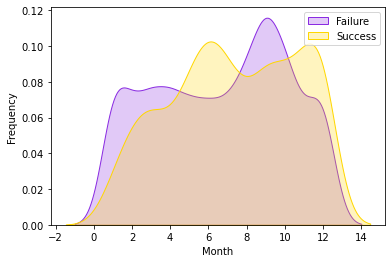

In [86]:
#title_month
g = sns.kdeplot(popularity_data.title_month[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
g = sns.kdeplot(popularity_data.title_month[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)
g.set_xlabel("Month")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

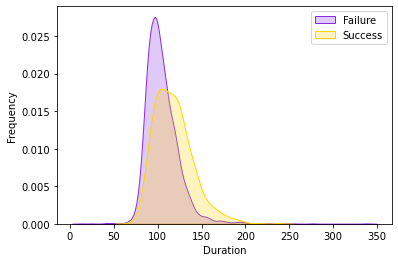

In [87]:
#duration 
g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)
g.set_xlabel("Duration")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

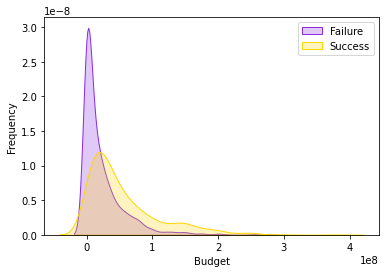

In [88]:
#duration 
g = sns.kdeplot(popularity_data.budget[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
g = sns.kdeplot(popularity_data.budget[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)
g.set_xlabel("Budget")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

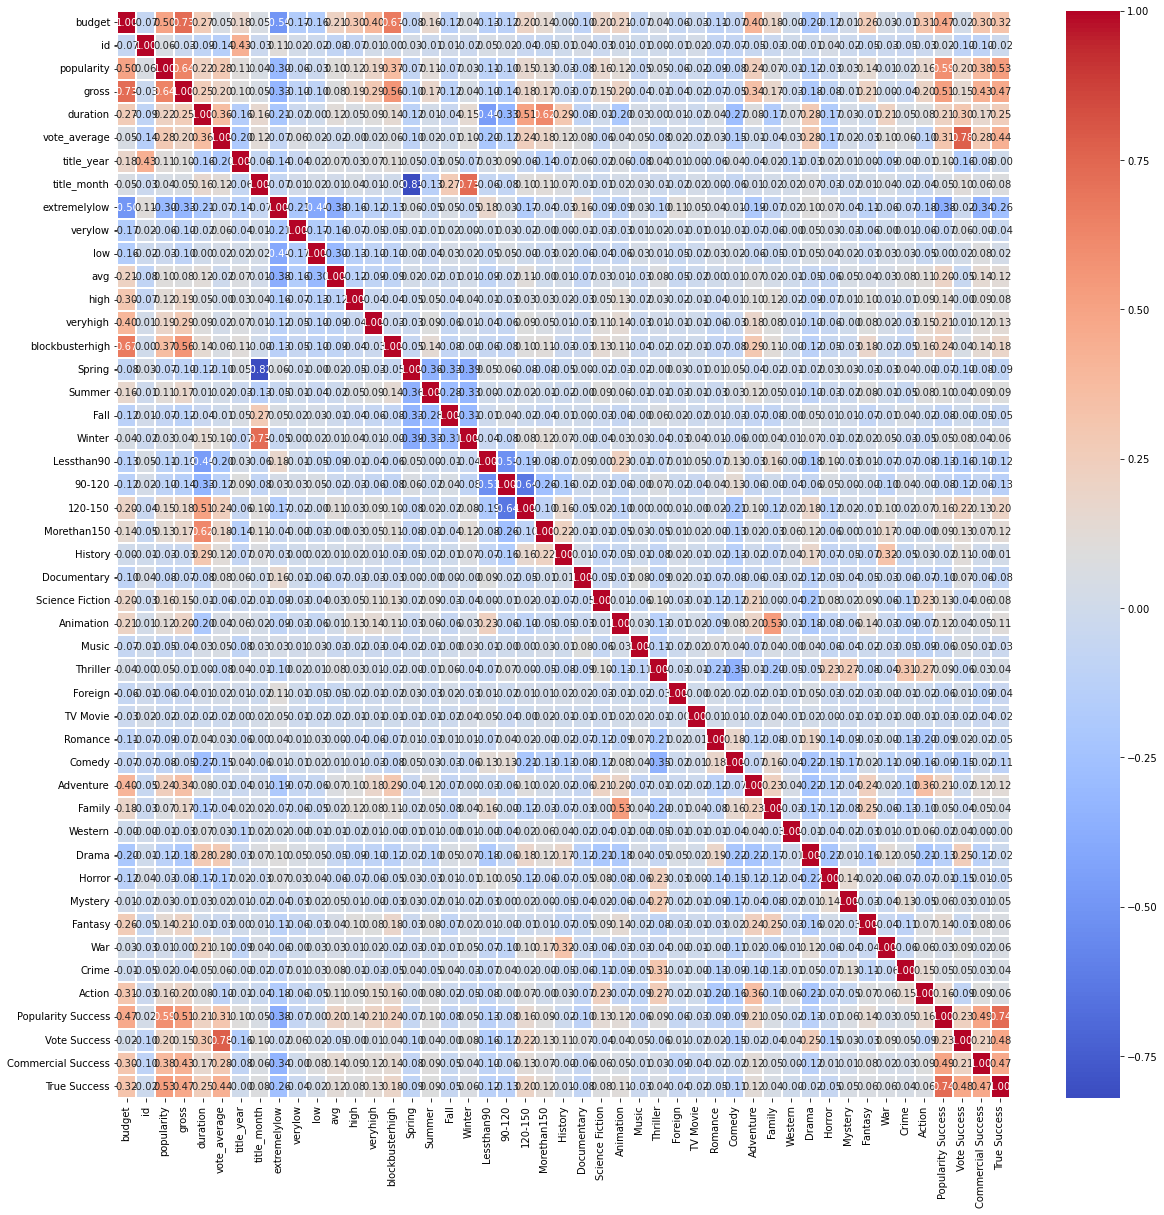

In [89]:
#correlation matrix with numerical values 
plt.figure(figsize = (20,20))
g = sns.heatmap(popularity_data[list(popularity_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

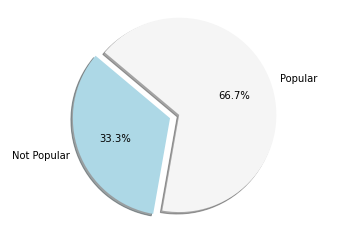

In [90]:
# Data to plot
labels =["Not Popular","Popular"]
sizes = popularity_data['Popularity Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

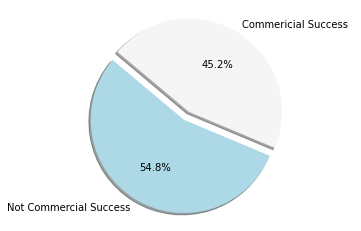

In [91]:
# Data to plot
labels =["Not Commercial Success","Commericial Success"]
sizes = popularity_data['Commercial Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

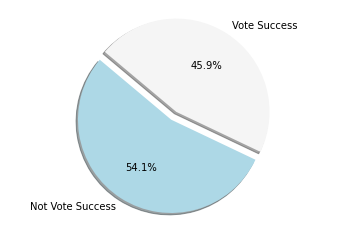

In [92]:
# Data to plot
labels =["Not Vote Success","Vote Success"]
sizes = popularity_data['Vote Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

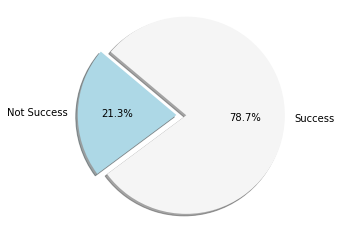

In [93]:
# Data to plot
labels =["Not Success","Success"]
sizes = popularity_data['True Success'].value_counts(sort = False)
colors = ["lightblue","whitesmoke"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

Time to drop the fields 

In [94]:
#title_year IS dropped atm for testing of months ; duration is dropped
popularity_data.drop(['id','budget','original_title','overview','spoken_languages','production_companies','production_countries','release_date','status',
          'tagline','movie_title','vote_average','language','director_name','actor_1_name','actor_2_name','actor_3_name',
          'companies_1','companies_2','companies_3','country','genres','plot_keywords','popularity','gross', 'title_month', 'duration', 'title_year'], axis=1, inplace=True)
popularity_data.columns

Index(['extremelylow', 'verylow', 'low', 'avg', 'high', 'veryhigh',
       'blockbusterhigh', 'Spring', 'Summer', 'Fall', 'Winter', 'Lessthan90',
       '90-120', '120-150', 'Morethan150', 'History', 'Documentary',
       'Science Fiction', 'Animation', 'Music', 'Thriller', 'Foreign',
       'TV Movie', 'Romance', 'Comedy', 'Adventure', 'Family', 'Western',
       'Drama', 'Horror', 'Mystery', 'Fantasy', 'War', 'Crime', 'Action',
       'Popularity Success', 'Vote Success', 'Commercial Success',
       'True Success'],
      dtype='object')

In [95]:
# #correlation matrix with numerical values after drop: so these looking at all feature that will be tested 
# plt.figure(figsize = (20,20))
# g = sns.heatmap(popularity_data[list(popularity_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

In [96]:
#when running aggregate/success drop the other success metics 
popularity_data.drop(['Popularity Success', 'Vote Success', 'Commercial Success'], axis=1, inplace=True)

In [97]:
popularity_data

,extremelylow,verylow,low,avg,high,veryhigh,blockbusterhigh,Spring,Summer,Fall,...,Family,Western,Drama,Horror,Mystery,Fantasy,War,Crime,Action,True Success
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,1
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4799,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4801,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Decision tree to determine success:

In [98]:
from sklearn import metrics

In [99]:

popularity_data['is_train'] = np.random.uniform(0, 1, len(popularity_data)) <= .75


In [100]:
train, test = popularity_data[popularity_data['is_train']==True], popularity_data[popularity_data['is_train']==False]
train.drop(['is_train'], axis=1, inplace=True)
test.drop(['is_train'], axis=1, inplace=True)

# Let's test against different Success Metrics 

# train["Popularity Success"] = train["Popularity Success"].astype(int)

# Y_train = train["Popularity Success"]
# X_train = train.drop(labels = ["Popularity Success"],axis = 1)

# Y_test = test["Popularity Success"]
# X_test = test.drop(labels = ["Popularity Success"],axis = 1)

# train["Vote Success"] = train["Vote Success"].astype(int)

# Y_train = train["Vote Success"]
# X_train = train.drop(labels = ["Vote Success"],axis = 1)

# Y_test = test["Vote Success"]
# X_test = test.drop(labels = ["Vote Success"],axis = 1)

# train["Commercial Success"] = train["Commercial Success"].astype(int)

# Y_train = train["Commercial Success"]
# X_train = train.drop(labels = ["Commercial Success"],axis = 1)

# Y_test = test["Commercial Success"]
# X_test = test.drop(labels = ["Commercial Success"],axis = 1)

# train["True Success"] = train["True Success"].astype(int)

Y_train = train["True Success"]
X_train = train.drop(labels = ["True Success"],axis = 1)

Y_test = test["True Success"]
X_test = test.drop(labels = ["True Success"],axis = 1)


C:\Users\saish\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [101]:
print(len(train))


3498


In [102]:
print(len(test))

1218


In [103]:
# here's the decision tree 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7)

In [104]:
from sklearn.model_selection import  cross_val_score
# Decision Tree - Cross Validation Score 
cross_val_dtc = cross_val_score(dtc, X_train, Y_train, cv=10)
cross_val_dtc.mean()

0.735301678264429

In [105]:
result = dtc.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)

dtcResults = pd.DataFrame(result[:,1])
dtcResults['Predict'] = dtcResults[0].map(lambda s: 1 if s >= 0.5  else 0)
dtcResults['testAnswer'] = pd.DataFrame(test_result)

dtcResults['Correct'] = np.where((dtcResults['Predict'] == dtcResults['testAnswer']), 1, 0)
dtcResults.head()

,0,Predict,testAnswer,Correct
0,0.000000,0,1,0
1,0.750000,1,1,1
2,0.750000,1,0,0
3,0.615385,1,1,1
4,1.000000,1,0,0


In [106]:
from sklearn.metrics import confusion_matrix
dtc_confusion = confusion_matrix(dtcResults['Predict'], dtcResults['testAnswer'])
print(dtc_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[888 168]
 [ 75  87]]


<AxesSubplot:>

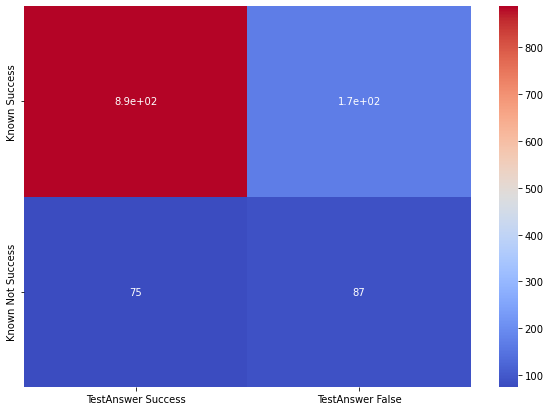

In [107]:
con_dec = pd.DataFrame(dtc_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [108]:
#test Data set - score 
dtcResults['Correct'].mean()


0.8004926108374384

In [109]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus# Export as dot file
# dot_data = StringIO()
# export_graphviz(dtc, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

Random forest model:

In [110]:
#heres a random forest tree model 
from sklearn.ensemble import RandomForestClassifier

randofor = RandomForestClassifier(max_depth=7)
randofor.fit(X_train, Y_train)


RandomForestClassifier(max_depth=7)

In [111]:
#Random Forest - cross validation score 
cross_val_randofor =  cross_val_score(randofor, X_train, Y_train, cv=10)
cross_val_randofor.mean()

0.7464502660663118

In [112]:
result = randofor.predict_proba(X_test)[:]
randoforResults = pd.DataFrame(result[:,1])
randoforResults['Predict'] = randoforResults[0].map(lambda s: 1 if s >= 0.5  else 0)
randoforResults['testAnswer'] = pd.DataFrame(test_result)

randoforResults['Correct'] = np.where((randoforResults['Predict'] == randoforResults['testAnswer'])
                     , 1, 0)
randoforResults.head()

,0,Predict,testAnswer,Correct
0,0.501534,1,1,1
1,0.668840,1,1,1
2,0.713267,1,0,0
3,0.629482,1,1,1
4,0.526265,1,0,0


In [114]:
from sklearn.metrics import confusion_matrix
randofor_confusion = confusion_matrix(randoforResults['Predict'], randoforResults['testAnswer'])
print(randofor_confusion) #Predict 1 and Test 0; Predict 0 and Test 1 #Predict 1 and Test 0; Predict 0 and Test 0

[[943 219]
 [ 20  36]]


<AxesSubplot:>

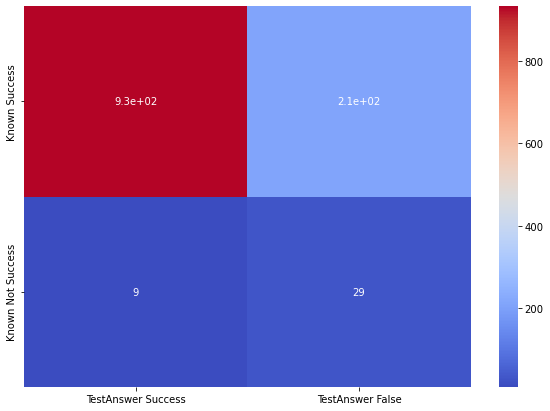

In [48]:
con_dec = pd.DataFrame(randofor_confusion, index = [i for i in ["Known Success", "Known Not Success"]],
columns = [i for i in ["TestAnswer Success", "TestAnswer False"]])
plt.figure(figsize = (10,7))
plt.xlabel("Predict")
plt.ylabel("TestAnswer")
sns.heatmap(con_dec, cmap = "coolwarm", annot=True)

In [49]:
randoforResults['Correct'].mean()


0.8159457167090755